In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

In [2]:
url = "http://bit.ly/w-data"
score_data = pd.read_csv(url)
print("Data imported successfully")

score_data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


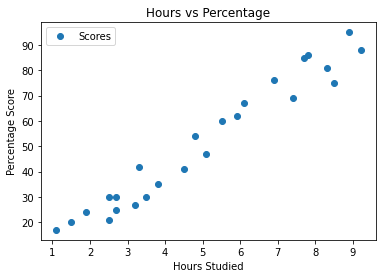

In [3]:
score_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [4]:
X = score_data.iloc[:, :-1].values  
y = score_data.iloc[:, 1].values

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [6]:
from sklearn.linear_model import LinearRegression  
lr= LinearRegression()  
lr.fit(X_train, y_train) 

print("Training complete.")

Training complete.


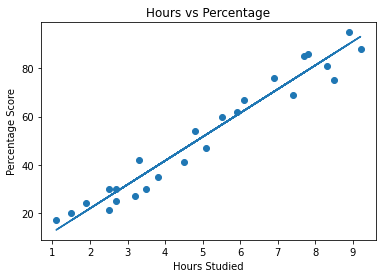

In [7]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [8]:
print(X_test) # Testing data - In Hours
y_pred = lr.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [9]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) #Comparing Prections with actual dataset
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [10]:
# You can also test with your own data
hours = (9.25)#checking for specified hour
own_pred = lr.predict(np.array(hours).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [11]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


In [12]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 21.5987693072174


In [13]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 4.6474476121003665


In [14]:
count_misclassified = (y_test != y_pred).sum()
count_misclassified

5